In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/healthcare-dataset/Outpatient_Pat.csv
/kaggle/input/healthcare-dataset/Transaction_coo.csv
/kaggle/input/healthcare-dataset/Inpatient_Pat.csv
/kaggle/input/healthcare-dataset/Outpatient_provdr.csv
/kaggle/input/healthcare-dataset/Rreview_transaction_coo.csv
/kaggle/input/healthcare-dataset/Patient_history_samp.csv
/kaggle/input/healthcare-dataset/Review_patient_history_samp.csv
/kaggle/input/healthcare-dataset/Inpatient_provdr.csv


In [2]:
h1 = pd.read_csv('/kaggle/input/healthcare-dataset/Rreview_transaction_coo.csv')
h2 = pd.read_csv('/kaggle/input/healthcare-dataset/Inpatient_Pat.csv')
h3 = pd.read_csv('/kaggle/input/healthcare-dataset/Outpatient_Pat.csv')
h4 = pd.read_csv('/kaggle/input/healthcare-dataset/Inpatient_provdr.csv')
h5 = pd.read_csv('/kaggle/input/healthcare-dataset/Review_patient_history_samp.csv')
h6 = pd.read_csv('/kaggle/input/healthcare-dataset/Transaction_coo.csv')
h7 = pd.read_csv('/kaggle/input/healthcare-dataset/Patient_history_samp.csv')
h8 = pd.read_csv('/kaggle/input/healthcare-dataset/Outpatient_provdr.csv')


In [3]:
#Review Transaction related data
h1.head(4)


,id,global_proc_id,count
0,65822,109,1
1,65822,125,1
2,119695,70,1
3,119695,124,1


In [4]:
h1.nunique()

id                5000
global_proc_id     129
count                1
dtype: int64

In [5]:
h1.sum().isnull()

id                False
global_proc_id    False
count             False
dtype: bool

In [6]:
#In - Patient Data
h2.head(4)

,DRG Definition,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,37861,29228.55368,6902.381289,5514.435910
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,37927,23924.98059,6809.799325,5791.920242
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,68163,49186.95644,13614.616130,12415.825360
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,110983,30371.27399,8037.269492,6858.689088


In [7]:
h2.nunique()

DRG Definition               100
Total Discharges             100
Average Covered Charges      100
Average Total Payments       100
Average Medicare Payments    100
dtype: int64

In [8]:
h2.sum().isnull()

DRG Definition               False
Total Discharges             False
Average Covered Charges      False
Average Total Payments       False
Average Medicare Payments    False
dtype: bool

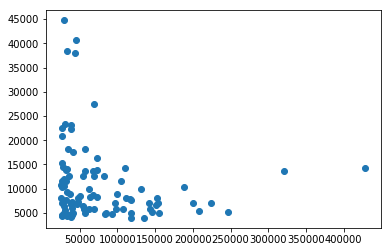

In [9]:
#Correlation between variables in Inpatient Data
import matplotlib
import matplotlib.pyplot as plt
plt.scatter('Total Discharges' ,  'Average Total Payments' , data = h2)
plt.show()

In [10]:
h2.corr()
# From the below output we can see that Total Discharges has weak negative correlation with Average Covered Charges,
# Average Total Payments and Average Medicare Payments

,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
Total Discharges,1.000000,-0.162209,-0.147992,-0.148260
Average Covered Charges,-0.162209,1.000000,0.993970,0.991259
Average Total Payments,-0.147992,0.993970,1.000000,0.999081
Average Medicare Payments,-0.148260,0.991259,0.999081,1.000000


In [11]:
#Outpatient data
h3.nunique()

APC                                    30
Outpatient Services                    30
Average Estimated Submitted Charges    30
Average Total Payments                 30
dtype: int64

In [12]:
h3.sum().isnull()

APC                                    False
Outpatient Services                    False
Average Estimated Submitted Charges    False
Average Total Payments                 False
dtype: bool

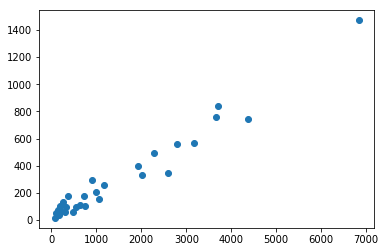

In [13]:
plt.scatter('Average Estimated Submitted Charges' ,  'Average Total Payments' , data = h3)
plt.show()
# From the below graph we can see that Estimated Charges and Total Payments have strong positive correlation
# This shows that the estimates are in line with actual payments

In [14]:
h4.head(5)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444


In [15]:
plt.figure(figsize=(15,10))
plot3 = sns.barplot(x= 'Provider State', y ='Average Total Payments', data = h4)

NameError: name 'sns' is not defined

<Figure size 1080x720 with 0 Axes>

In [16]:
#InPatient Provider City
city_count  = h4['Provider City'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('InPatient Provider in top 10 cities')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()


NameError: name 'sns' is not defined

<Figure size 720x360 with 0 Axes>

In [17]:
# Inpatient by State
state_count  = h4['Provider State'].value_counts()
state_count = state_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(state_count.index, state_count.values, alpha=0.8)
plt.title('InPatient  in top 10 states ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.show()

NameError: name 'sns' is not defined

<Figure size 720x360 with 0 Axes>

In [18]:
# Inpatient by Zip Code
zipcode_count  = h4['Provider Zip Code'].value_counts()
zipcode_count = zipcode_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(zipcode_count.index,zipcode_count.values, alpha=0.8)
plt.title('InPatient  in top 10 Zip Code ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Zipcode', fontsize=12)
plt.show()

NameError: name 'sns' is not defined

<Figure size 720x360 with 0 Axes>

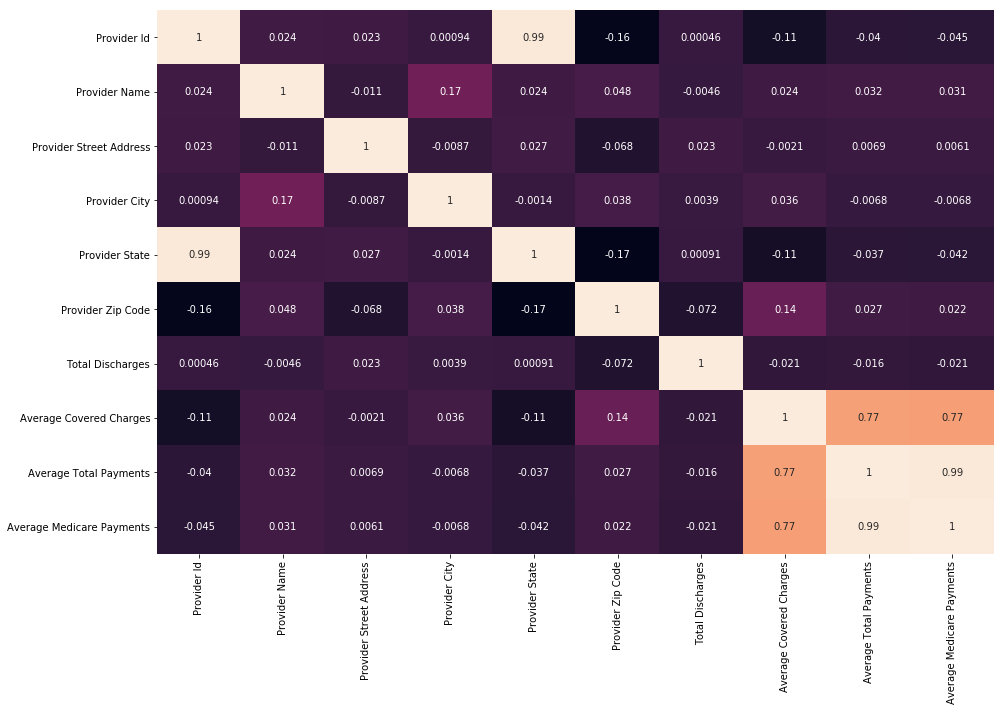

In [19]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(h4['Provider Name'].drop_duplicates())
h4['Provider Name']=encoder.transform(h4['Provider Name'])
encoder.fit(h4['Provider Street Address'].drop_duplicates())
h4['Provider Street Address']=encoder.transform(h4['Provider Street Address'])
encoder.fit(h4['Provider City'].drop_duplicates())
h4['Provider City']=encoder.transform(h4['Provider City'])
encoder.fit(h4['Provider State'].drop_duplicates())
h4['Provider State']=encoder.transform(h4['Provider State'])


corr = h4.corr()
plt.figure(figsize=(15,10))
sns.color_palette("Blues")
sns.heatmap(corr , annot=True , cbar=False)
plt.show()

In [20]:
#Review_Patient_Sample_Code
h5 = pd.read_csv('/kaggle/input/healthcare-dataset/Review_patient_history_samp.csv')
h5.head(5)

,id,age,gender,income
0,381693273,65-74,F,24000-31999
1,444060924,65-74,M,24000-31999
2,3641691,65-74,F,24000-31999
3,672653795,65-74,M,48000+
4,144916176,<65,F,48000+


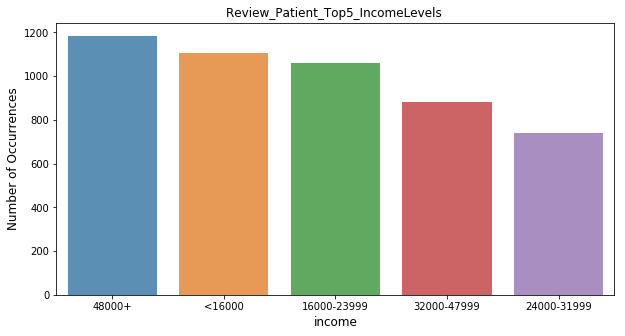

In [21]:
# Review_Patient_Sample_Code
income_ct  = h5['income'].value_counts()
income_ct = income_ct[:5,]
plt.figure(figsize=(10,5))
sns.barplot(income_ct.index,income_ct.values, alpha=0.8)
plt.title('Review_Patient_Top5_IncomeLevels ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('income', fontsize=12)
plt.show()

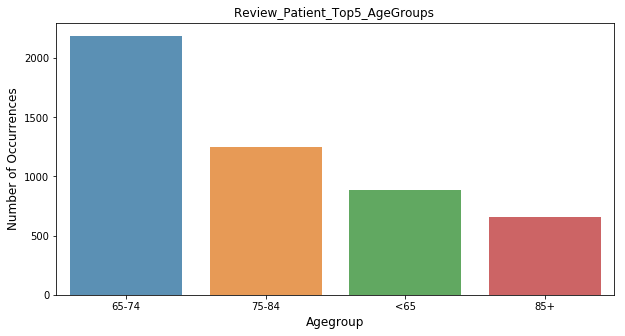

In [22]:
# Review_Patient_Sample_Code
age_ct  = h5['age'].value_counts()
age_ct = age_ct[:5,]
plt.figure(figsize=(10,5))
sns.barplot(age_ct.index,age_ct.values, alpha=0.8)
plt.title('Review_Patient_Top5_AgeGroups ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Agegroup', fontsize=12)
plt.show()

In [23]:
#Transaction_COO
h6.head(5)

,id,global_proc_id,count
0,159125,1,1
1,191852,1,1
2,321083,1,1
3,383037,1,1
4,467729,1,1


In [24]:
# Patient_History_Sample
h7.head(5)

,id,age,gender,income
0,306535165,65-74,F,24000-31999
1,742231134,65-74,F,48000+
2,928807201,75-84,M,24000-31999
3,83686538,<65,F,32000-47999
4,755607449,65-74,F,48000+


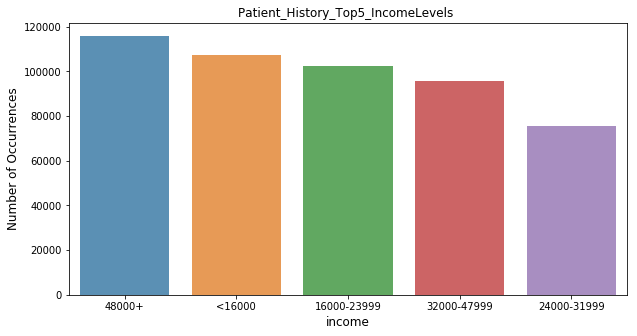

In [25]:
# Patient_History_Sample
income_ct  = h7['income'].value_counts()
income_ct = income_ct[:5,]
plt.figure(figsize=(10,5))
sns.barplot(income_ct.index,income_ct.values, alpha=0.8)
plt.title('Patient_History_Top5_IncomeLevels ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('income', fontsize=12)
plt.show()

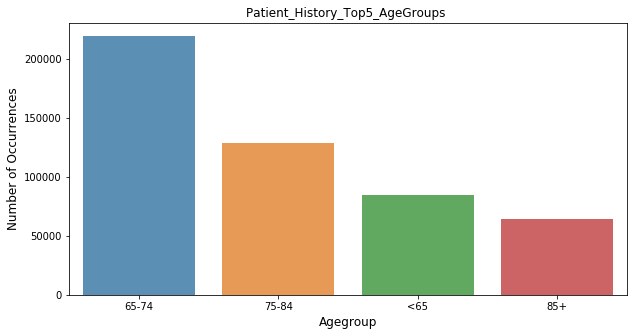

In [26]:
# Patient_History_Sample
age_ct  = h7['age'].value_counts()
age_ct = age_ct[:5,]
plt.figure(figsize=(10,5))
sns.barplot(age_ct.index,age_ct.values, alpha=0.8)
plt.title('Patient_History_Top5_AgeGroups ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Agegroup', fontsize=12)
plt.show()

In [27]:
h8.head(5)

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045455,16.569091


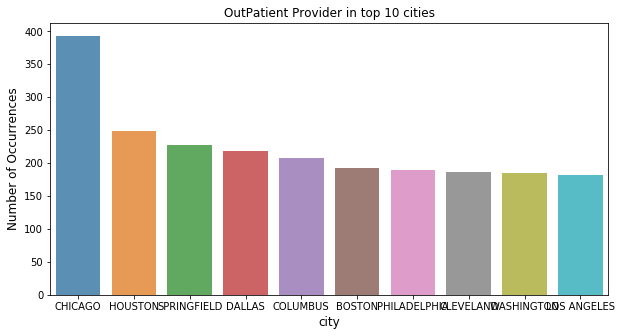

In [28]:
#Outpatient_Provider
city_count  = h8['Provider City'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('OutPatient Provider in top 10 cities')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

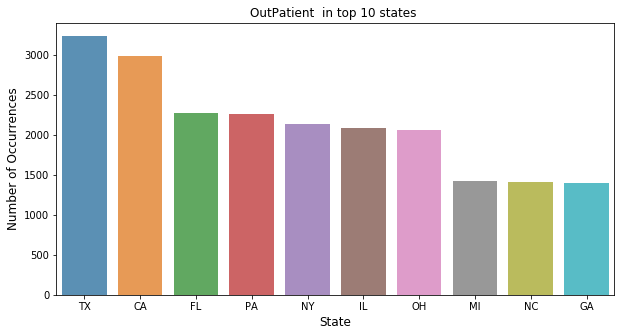

In [29]:
# Outpatient by State
state_count  = h8['Provider State'].value_counts()
state_count = state_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(state_count.index, state_count.values, alpha=0.8)
plt.title('OutPatient  in top 10 states ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.show()

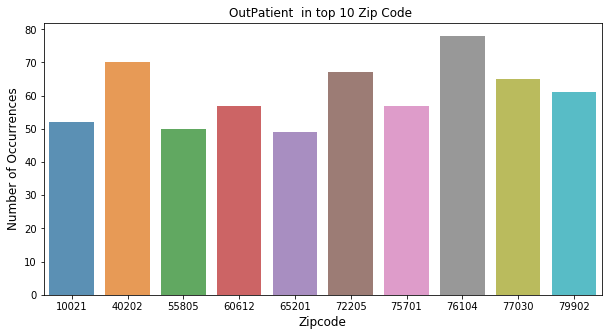

In [30]:
# Outpatient by Zip Code
zipcode_count  = h8['Provider Zip Code'].value_counts()
zipcode_count = zipcode_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(zipcode_count.index,zipcode_count.values, alpha=0.8)
plt.title('OutPatient  in top 10 Zip Code ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Zipcode', fontsize=12)
plt.show()

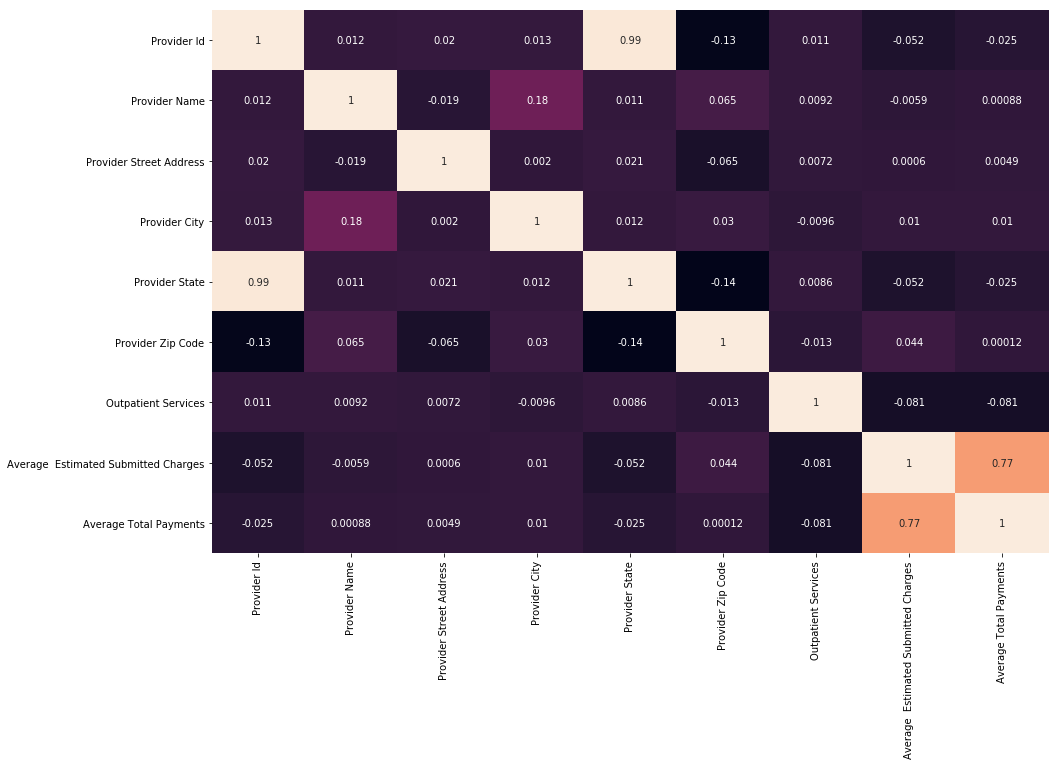

In [31]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(h8['Provider Name'].drop_duplicates())
h8['Provider Name']=encoder.transform(h8['Provider Name'])
encoder.fit(h8['Provider Street Address'].drop_duplicates())
h8['Provider Street Address']=encoder.transform(h8['Provider Street Address'])
encoder.fit(h8['Provider City'].drop_duplicates())
h8['Provider City']=encoder.transform(h8['Provider City'])
encoder.fit(h8['Provider State'].drop_duplicates())
h8['Provider State']=encoder.transform(h8['Provider State'])


corr = h8.corr()
plt.figure(figsize=(15,10))
sns.color_palette("Blues")
sns.heatmap(corr , annot=True , cbar=False)
plt.show()